In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
tripep = pd.read_csv('tripeptide_AP.txt', sep=': ', header=1, index_col=False, engine= 'python')
ttpep = pd.read_csv('tetrepeptides_AP.txt', sep=': ', header=1, index_col=False, engine= 'python')
pentpep = pd.read_csv('pentapeptides_AP.txt', sep=': ', header=1, index_col=False, engine= 'python')
hexapep = pd.read_csv('hexapeptides_AP.txt', sep=': ', header=1, index_col=False, engine= 'python')
heptpep = pd.read_csv('heptapeptides_AP.txt', sep=': ', header=1, index_col=False, engine= 'python')

In [132]:
def rem(r1, r2, df):            #remove peptides in range r1 to r2 (r1<r2 AP) and retains 1/3rd of them
    uldf = df[df['AP']<r2]
    lldf = df[df['AP']>r1]
    com = pd.merge(lldf,uldf,how='inner')
    addf = com[:int(len(com)/3)]
    df = df[~df['Peptides'].isin(com['Peptides'])]
    return pd.concat([df, addf])

def pltdis(df):                 #plots distribution of AP in a dataframe df
    plt.hist(df)
    plt.xlabel('AP')
    plt.ylabel('Peptide count')
    plt.show()
    return 

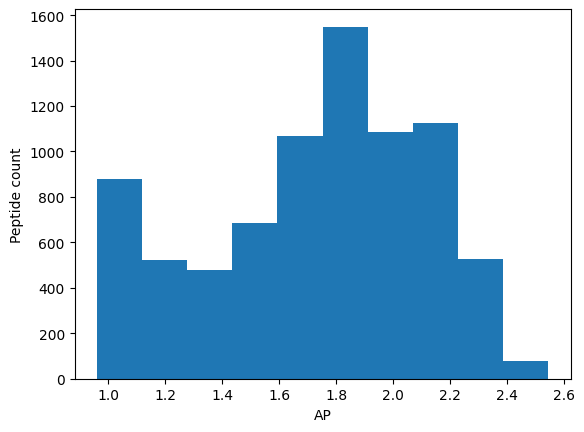

In [108]:
plt.hist(tripep['AP'])
plt.xlabel('AP')
plt.ylabel('Peptide count')
plt.show()

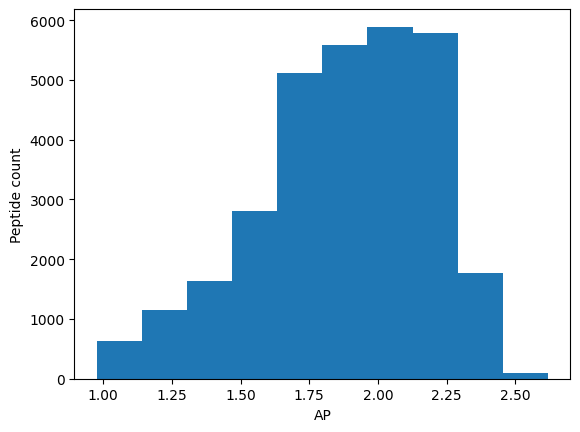

In [133]:
plt.hist(ttpep['AP'])
plt.xlabel('AP')
plt.ylabel('Peptide count')
plt.show()

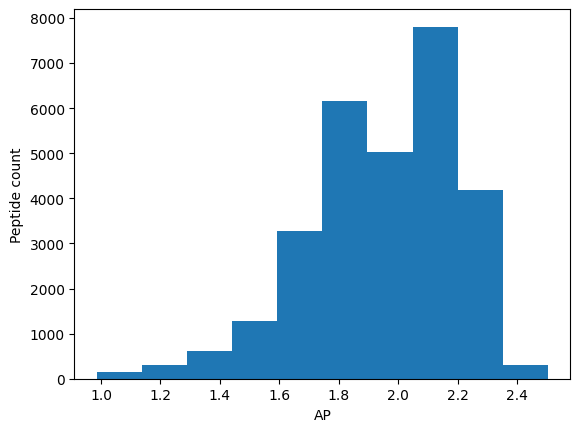

In [110]:
plt.hist(pentpep['AP'])
plt.xlabel('AP')
plt.ylabel('Peptide count')
plt.show()

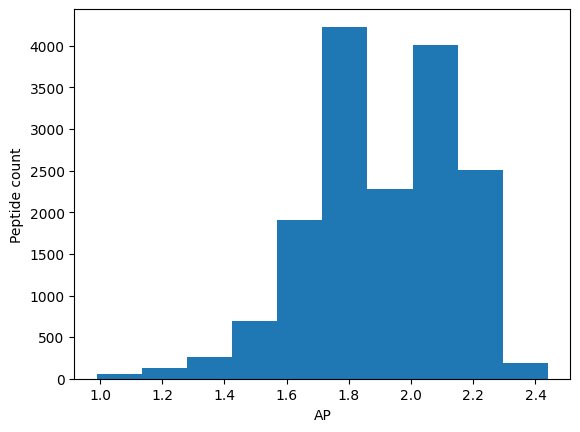

In [111]:
plt.hist(hexapep['AP'])
plt.xlabel('AP')
plt.ylabel('Peptide count')
plt.show()

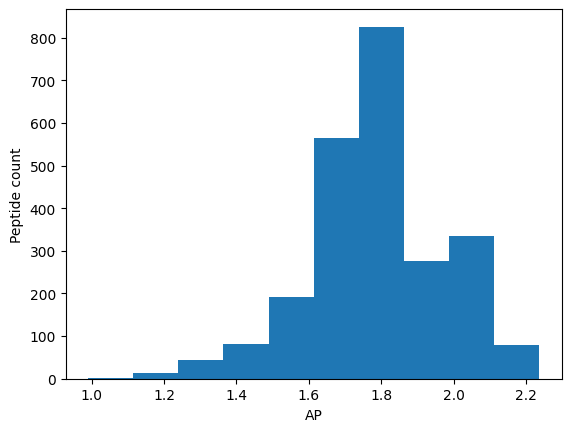

In [112]:
plt.hist(heptpep['AP'])
plt.xlabel('AP')
plt.ylabel('Peptide count')
plt.show()

In [ ]:
def rem(r1, r2, df):            #remove peptides in range r1 to r2 (r1<r2 AP) and retains 1/3rd of them
    uldf = df[df['AP']<r2]
    lldf = df[df['AP']>r1]
    com = pd.merge(lldf,uldf,how='inner')
    addf = com[:int(len(com)/3)]
    df = df[~df['Peptides'].isin(com['Peptides'])]
    return pd.concat(df, addf)

    

In [166]:
hexapep = rem(1.6,2.3, hexapep)
hexapep

,Peptides,AP
0,ALA-ALA-ALA-ALA-ALA-ALA,1.412390
1,ALA-ALA-ALA-ASN-GLN-CYS,1.271259
5,ALA-ALA-ARG-PRO-MET-GLY,1.401150
7,ALA-ALA-CYS-ARG-LYS-MET,1.246135
11,ALA-ALA-LEU-GLY-CYS-ARG,1.467228
...,...,...
4904,TRP-TRP-TRP-LEU-TRP-LEU,2.029740
4905,LEU-TRP-TRP-TRP-TRP-ASP,1.858471
4906,TRP-TRP-TRP-TRP-LEU-LEU,2.018643
4907,LEU-TRP-TYR-ALA-TYR-TYR,2.202195


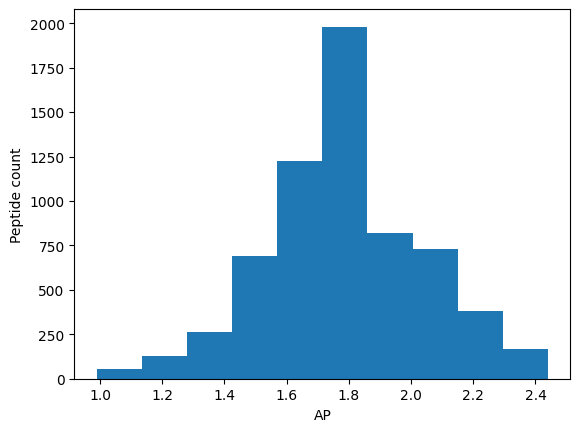

In [167]:
plt.hist(hexapep['AP'])
plt.xlabel('AP')
plt.ylabel('Peptide count')
plt.show()

In [139]:
def one_letter_to_smiles(sequence):
    # Define a dictionary mapping one-letter codes to SMILES strings
    aa_to_smiles = {
        'A': 'N[C@@H](C)C(=O)',
        'R': 'N[C@@H](CCCNC(N)=N)C(=O)',
        'N': 'N[C@@H](CC(N)=O)C(=O)',
        'D': 'N[C@@H](CC(O)=O)C(=O)',
        'C': 'N[C@@H](CS)C(=O)',
        'Q': 'N[C@@H](CCC(N)=O)C(=O)',
        'E': 'N[C@@H](CCC(O)=O)C(=O)',
        'G': 'NCC(=O)',
        'H': 'N[C@@H](CC1=CNC=N1)C(=O)',
        'I': 'N[C@@H]([C@@H](C)CC)C(=O)',
        'L': 'N[C@@H](CC(C)C)C(=O)',
        'K': 'N[C@@H](CCCCN)C(=O)',
        'M': 'N[C@@H](CCSC)C(=O)',
        'F': 'N[C@@H](CC1=CC=CC=C1)C(=O)',
        'P': 'N1CCC[C@H]1C(=O)',
        'S': 'N[C@@H](CO)C(=O)',
        'T': 'N[C@@H]([C@@H](C)O)C(=O)',
        'W': 'N[C@@H](CC1=CNC2=C1C=CC=C2)C(=O)',
        'Y': 'N[C@@H](CC1=CC=C(O)C=C1)C(=O)',
        'V': 'N[C@@H](C(C)C)C(=O)'
    }
    
    smiles_sequence = ''.join([aa_to_smiles[aa] for aa in sequence])
    smiles_sequence = '[H]' + smiles_sequence[:-3] + 'O)=O'
    
    return smiles_sequence

def three2one(s,d):
    a = ''
    c = ''
    for i in range(len(s)):
        if s[i] != '-':
            c = c+s[i]
        else:
            a = a + list(d.keys())[list(d.values()).index(c)]
            c = ''
    return a

#three2one('ALA-ALA-LYS'+'-',a)




In [168]:
import random as rn
rn.seed(42)
a = np.zeros((1440,))               #check the number of peptides in the df and adjust the amount of data that needs to be feed into train/test
b = np.ones((5000,))               #ones go into train set and zeros go into test set
b = np.append(a,b)
rn.shuffle(b)
b

array([1., 1., 1., ..., 0., 0., 1.])

In [169]:
smiles = open('hexapepsmi_ub_train.txt','a')
tst = open('hexapepsmi_ub_test.txt','a')
pep = open('testhexapepsub.txt','a')
a = {'A':'ALA','R':'ARG','N':'ASN','D':'ASP','C':'CYS','E':'GLU','H':'HSE','Q':'GLN','G':'GLY','I':'ILE','L':'LEU','K':'LYS','M':'MET','F':'PHE','P':'PRO','S':'SER','T':'THR','W':'TRP','Y':'TYR','V':'VAL'}
peptides = np.array(hexapep['Peptides'])
AP = np.array(hexapep['AP'])                                  #change the df in variable peptides & AP and the change the file name appropriately 
for i in range(len(peptides)):                  
    if b[i]==1:
        smiles.write(str(one_letter_to_smiles(three2one(peptides[i]+'-',a)))+' '+str(AP[i])+'\n')
    else:
        tst.write(str(one_letter_to_smiles(three2one(peptides[i]+'-',a)))+' '+str(AP[i])+'\n')
        pep.write(peptides[i]+' '+str(AP[i])+'\n')